In [1]:
!pip install emoji

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import emoji

### Loading dataset

In [3]:
df = pd.read_csv("C:/Users/joelk/automated-review-rating-system/data/Kaggle Datasets/Disneyland_Reviews.csv", encoding="latin1")

### Exploring structure of data

In [4]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [5]:
df.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,missing,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [6]:
df.shape

(42656, 6)

In [7]:
df['Rating'].value_counts()

Rating
5    23146
4    10775
3     5109
2     2127
1     1499
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


#### Dataset contains 42656 sample of reviews with 6 attributes

In [9]:
df.isnull().sum()

Review_ID            0
Rating               0
Year_Month           0
Reviewer_Location    0
Review_Text          0
Branch               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(12)

#### There are 12 rows of duplicated samples and no missing values are found.

In [11]:
df = df.drop_duplicates(subset=['Review_Text', 'Rating'])

In [12]:
df.shape

(42633, 6)

In [13]:
conflicts = df.groupby('Review_Text')['Rating'].nunique()
conflicting_reviews = conflicts[conflicts > 1].index
print("Number of reviews with conflicting ratings:", len(conflicting_reviews))

Number of reviews with conflicting ratings: 1


In [14]:
df = df[~df['Review_Text'].isin(conflicting_reviews)]

In [15]:
df.shape

(42631, 6)

In [16]:
df['Branch'].unique()

array(['Disneyland_HongKong', 'Disneyland_California', 'Disneyland_Paris'],
      dtype=object)

### Removing unnecessary columns

In [17]:
df = df.drop('Review_ID', axis=1)

In [18]:
df = df.drop('Reviewer_Location', axis=1)

In [19]:
df = df.drop('Branch', axis=1)

In [20]:
df = df.drop('Year_Month', axis=1)

### Normalizing the text in Review_Text

In [21]:
# Set to collect unique stopwords found in dataset
unique_stopwords_found = set()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_review(text):
    global unique_stopwords_found
    
    if not isinstance(text, str):
        return None

    # Converting all reviews into lowercase
    text = text.lower()

    # Removing HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Removing URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # Removing punctuation and special characters
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Removing emojis
    text = text.encode("ascii", "ignore").decode("ascii")

    # Tokenizing the reviews
    tokens = text.split()

    # Track stopwords present in this review
    review_stopwords = set([word for word in tokens if word in stop_words])
    unique_stopwords_found.update(review_stopwords)

    # Removing stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Filtering too short or too long reviews
    if len(tokens) < 3 or len(tokens) > 100:
        return None

    return " ".join(tokens)


In [22]:
df['cleaned_review'] = df['Review_Text'].apply(normalize_review)

In [23]:
# 1. Total number of unique stopwords found in dataset
print("Total unique stopwords in dataset:", len(unique_stopwords_found))

# 2. Print all unique stopwords found in dataset
print("Unique stopwords in dataset:\n", unique_stopwords_found)


Total unique stopwords in dataset: 151
Unique stopwords in dataset:
 {'s', 'were', 'both', 'before', 'weren', 'itself', 'did', 'through', 'you', 'their', 'yourself', 'some', 'because', 'then', 'our', 'me', 'is', 'after', 'they', 'having', 'or', 'against', 'with', 'which', 'more', 'above', 'out', 'his', 'she', 'between', 'off', 'wasn', 'been', 'during', 'up', 'other', 'there', 'couldn', 'again', 'here', 'now', 'hasn', 'own', 'a', 'themselves', 've', 'further', 'same', 'being', 'my', 'ours', 'this', 'ain', 'those', 'ma', 'these', 'on', 'so', 'at', 'if', 'her', 'doing', 'that', 'what', 'yourselves', 'has', 'was', 'it', 'and', 'your', 'its', 'he', 'about', 'don', 'him', 'theirs', 'won', 'to', 'why', 'haven', 'o', 'shan', 'into', 'isn', 'for', 'under', 'once', 'while', 'not', 'when', 'y', 'hadn', 'have', 'needn', 'doesn', 'herself', 'myself', 'can', 'below', 'the', 'no', 'down', 'do', 'until', 'them', 'in', 'an', 'himself', 'be', 'i', 'but', 'such', 'each', 'didn', 'are', 'over', 'shouldn',

In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'s', 'were', 'both', 'before', 'weren', 'itself', 'did', "he'll", 'through', 'their', "weren't", 'you', 'yourself', 'some', 'because', "mightn't", 'then', 'our', 'me', 'after', 'is', 'they', 'having', 'or', "we'd", 'against', 'with', 'above', 'more', 'mustn', 'which', 'out', 'his', 'she', 'between', 'off', 'wasn', 'been', "i've", 'during', 'up', 'other', 'there', 'couldn', 'again', 'here', 'now', 'hasn', 'own', "we'll", 'a', "should've", "he's", "you've", "you'll", 'themselves', 've', 'further', 'same', 'being', 'my', 'ours', 'this', 'ain', 'those', 'ma', 'these', 'on', 'at', 'her', 'if', 'so', 'doing', 'that', 'what', "they're", 'yourselves', 'has', 'was', 'and', 'it', 'your', 'he', 'its', 'about', "isn't", 'don', 'him', 'theirs', 'won', "doesn't", 'to', 'shan', 'haven', "it's", 'o', 'why', 'into', "haven't", 'isn', 'for', 'under', 'once', 'while', 'not', "they'd", 'when', "we're", 'y', "wouldn't", 'hadn', 'have', 'needn', "she'd", 'doesn', 'herself', "hadn't", 'myself', "shan't", 'c

In [25]:
df = df.dropna(subset=['cleaned_review'])

In [26]:
df

,Rating,Review_Text,cleaned_review
0,4,If you've ever been to Disneyland anywhere you...,youve ever disneyland anywhere youll find disn...
2,4,Thanks God it wasn t too hot or too humid wh...,thanks god hot humid visiting park otherwise w...
3,4,HK Disneyland is a great compact park. Unfortu...,hk disneyland great compact park unfortunately...
4,4,"the location is not in the city, took around 1...",location city took around 1 hour kowlon kid li...
5,3,"Have been to Disney World, Disneyland Anaheim ...",disney world disneyland anaheim tokyo disneyla...
...,...,...,...
42651,5,i went to disneyland paris in july 03 and thou...,went disneyland paris july 03 thought brillian...
42652,5,2 adults and 1 child of 11 visited Disneyland ...,2 adult 1 child 11 visited disneyland paris be...
42653,5,My eleven year old daughter and myself went to...,eleven year old daughter went visit son london...
42654,4,"This hotel, part of the Disneyland Paris compl...",hotel part disneyland paris complex wonderful ...


In [27]:
df.shape

(34987, 3)

In [28]:
df = df.drop('Review_Text', axis=1)

### Visualization

C:\Users\joelk\AppData\Local\Temp\ipykernel_18944\3511575154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis', order=sorted(df['Rating'].unique()))


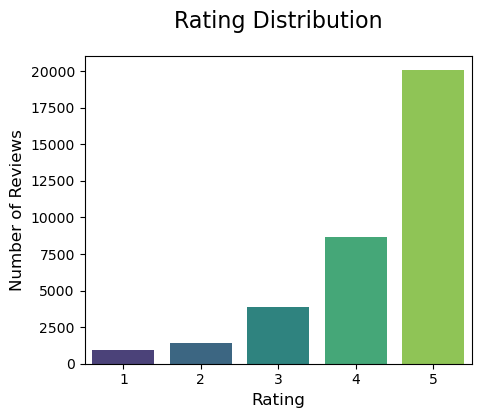

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(x='Rating', data=df, palette='viridis', order=sorted(df['Rating'].unique()))
plt.title("Rating Distribution", fontsize=16, pad=20)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()

In [30]:
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))

In [31]:
df

,Rating,cleaned_review,word_count
0,4,youve ever disneyland anywhere youll find disn...,33
2,4,thanks god hot humid visiting park otherwise w...,82
3,4,hk disneyland great compact park unfortunately...,46
4,4,location city took around 1 hour kowlon kid li...,18
5,3,disney world disneyland anaheim tokyo disneyla...,87
...,...,...,...
42651,5,went disneyland paris july 03 thought brillian...,84
42652,5,2 adult 1 child 11 visited disneyland paris be...,94
42653,5,eleven year old daughter went visit son london...,54
42654,4,hotel part disneyland paris complex wonderful ...,62


In [32]:
df['word_count'].describe()

count    34987.000000
mean        39.876040
std         23.706727
min          3.000000
25%         21.000000
50%         34.000000
75%         55.000000
max        100.000000
Name: word_count, dtype: float64

C:\Users\joelk\AppData\Local\Temp\ipykernel_18944\350105827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Rating", y="word_count", palette="viridis")


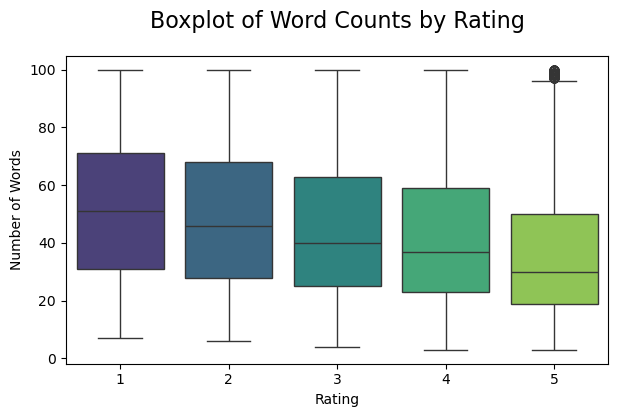

In [33]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Rating", y="word_count", palette="viridis")
plt.title("Boxplot of Word Counts by Rating", fontsize=16, pad=20)
plt.xlabel("Rating")
plt.ylabel("Number of Words")
plt.show()

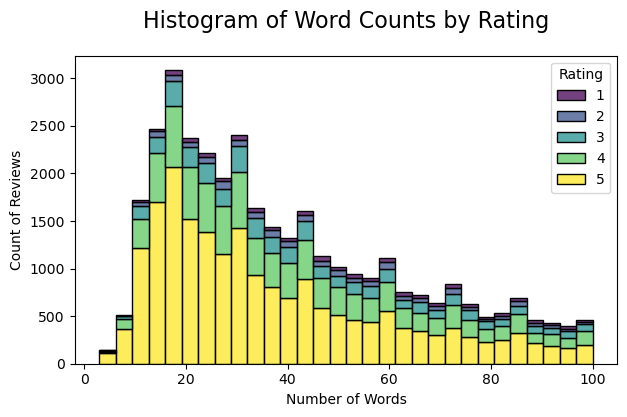

In [34]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x="word_count", hue="Rating", bins=30, multiple="stack", palette="viridis")
plt.title("Histogram of Word Counts by Rating", fontsize=16, pad=20)
plt.xlabel("Number of Words")
plt.ylabel("Count of Reviews")
plt.show()

#### Displaying several reviews of each rating

In [35]:
for rating in sorted(df["Rating"].unique()):
    print(f"\n======================= Rating: {rating} =======================\n")
    sample_reviews = df[df["Rating"] == rating]["cleaned_review"].sample(n=5, random_state=42)  
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")


======================= Rating: 1 =======================

1. partner recently stayed teacher school trip spoke highly service attraction whilst stay bought mikey minnie photo frame gift bring home though got home discovered shocking quality product material peeling back stand paint work look like done toddler crayon general quality product disgracefuli would advise future review quality product sale resort shop avoid disappointment shabby photo frame ruined supposed romantic gesture well done disney

2. visiting disneyland world around globe feel qualified write review particular oneit definitely worst longest line ever seen ride open many staff member around lot people problem using fastpass machine one sight help happened one occasioni definitely agree another review saw visitor park bad queue etiquette pushing back pushing standing way close argh yes smokingdisneyland tokyo far best disneyland go one make oneif come paris dont waste day 6 hour park got 1 ride theatre showstand lin

In [36]:
df['Rating'].value_counts()

Rating
5    20045
4     8673
3     3873
2     1432
1      964
Name: count, dtype: int64

### Creating balanced dataset 

In [37]:
from sklearn.utils import resample

n_samples = 2000  # desired number per class

balanced_df = pd.DataFrame()

for rating in df['Rating'].unique():
    df_rating = df[df['Rating'] == rating]
    
    if len(df_rating) < n_samples:
        # Oversample with replacement for small classes
        df_resampled = resample(df_rating,
                                replace=True,
                                n_samples=n_samples,
                                random_state=42)
    else:
        # Downsample without replacement for large classes
        df_resampled = resample(df_rating,
                                replace=False,
                                n_samples=n_samples,
                                random_state=42)
    
    balanced_df = pd.concat([balanced_df, df_resampled])

# Shuffling the final dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [38]:
balanced_df.shape

(10000, 3)

In [39]:
balanced_df['Rating'].value_counts().sort_index()

Rating
1    2000
2    2000
3    2000
4    2000
5    2000
Name: count, dtype: int64

C:\Users\joelk\AppData\Local\Temp\ipykernel_18944\2154460271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=balanced_df, palette='viridis', order=sorted(df['Rating'].unique()))


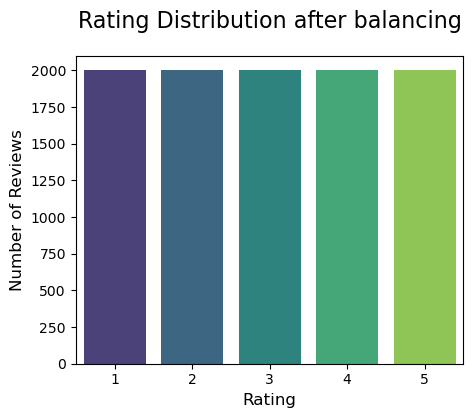

In [40]:
plt.figure(figsize=(5,4))
sns.countplot(x='Rating', data=balanced_df, palette='viridis', order=sorted(df['Rating'].unique()))
plt.title("Rating Distribution after balancing", fontsize=16, pad=20)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.show()

In [41]:
balanced_df

,Rating,cleaned_review,word_count
0,2,went hk disneyland 5 april happens qing ming f...,82
1,5,wow wow wow 10 trip disney america never felt ...,37
2,4,2 year old favourite see golden mickey show pa...,46
3,5,one main attraction hong kong must see without...,14
4,5,loved loved loved loved loved iti 30 bloody lo...,26
...,...,...,...
9995,5,paris one beautiful city worldthere many charm...,35
9996,5,family spend 2 wonderful day park lot ride go ...,59
9997,5,visited paris took 11 year old 8 year old u th...,39
9998,4,little small compared disney park castle jungl...,15


In [42]:
df.to_csv("balanced_disneyland_reviews_data.csv", index=False)

## Train-Test Splitting

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x = balanced_df['cleaned_review']
y = balanced_df['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
print("Training set class distribution:")
print(y_train.value_counts())


Training set class distribution:
Rating
1    1600
4    1600
3    1600
2    1600
5    1600
Name: count, dtype: int64


In [46]:
print("\nTest set class distribution:")
print(y_test.value_counts())



Test set class distribution:
Rating
1    400
2    400
3    400
5    400
4    400
Name: count, dtype: int64


In [47]:
# Appying preprocessing to train test sets

x_train_clean = x_train.apply(normalize_review)
x_test_clean  = x_test.apply(normalize_review)

#Removing rows that didn't pass the preprocessing
train_mask = x_train_clean.notna()
test_mask  = x_test_clean.notna()

x_train_clean, y_train = x_train_clean[train_mask], y_train[train_mask]
x_test_clean, y_test   = x_test_clean[test_mask], y_test[test_mask]

In [48]:

df_new = pd.DataFrame({
    'cleaned_review': x_test_clean,
    'rating': y_test
})

# Export to CSV
output_filename = 'balanced_test_set.csv'
df_new.to_csv(output_filename, index=False)


## Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_A = TfidfVectorizer(max_features=7000,
                            ngram_range=(1,2),
                            min_df=5,
                            max_df=0.9)

# fitting on training data
x_train_vec = vectorizer_A.fit_transform(x_train_clean)

# Transforming the test data
x_test_vec = vectorizer_A.transform(x_test_clean)

print(x_train_vec.shape, x_test_vec.shape)

(8000, 7000) (2000, 7000)


## Model Building

## Logistic Regression

#### Importing Libraries required for model.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Initiating the model

In [51]:
lr_model = LogisticRegression(multi_class = "multinomial",
                           solver = "lbfgs", #softmax function
                           max_iter = 500, 
                           random_state = 42)

#### Fitting the model on training set

In [52]:
lr_model.fit(x_train_vec, y_train)

C:\Users\joelk\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial', random_state=42)

#### Making Predictions on test data

In [53]:
y_pred_lr = lr_model.predict(x_test_vec)

### Evaluating the model

In [54]:
#Accuracy of model
accuracy_lr = accuracy_score(y_test, y_pred_lr)

#precision, recall, f1_score
precision_lr = precision_score(y_test, y_pred_lr, average="macro")

recall_lr = recall_score(y_test, y_pred_lr, average="macro")

f1_lr = f1_score(y_test, y_pred_lr, average="macro")

#Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


print("\nAccuracy of model : ",accuracy_lr)
print("Precision         : ",precision_lr)
print("Recall            : ",recall_lr)
print("F1 Score          : ",f1_lr)
print("\nConfusion Matrix : \n",conf_matrix_lr)


Accuracy of model :  0.611
Precision         :  0.6011059315850262
Recall            :  0.611
F1 Score          :  0.6045153746627362

Confusion Matrix : 
 [[348  25  17   5   5]
 [ 55 277  54   9   5]
 [ 47  73 172  73  35]
 [ 15  19  90 170 106]
 [  6   6  27 106 255]]


In [55]:
train_accuracy = lr_model.score(x_train_vec, y_train)
test_accuracy = lr_model.score(x_test_vec, y_test)
print(train_accuracy, test_accuracy)


0.843875 0.611


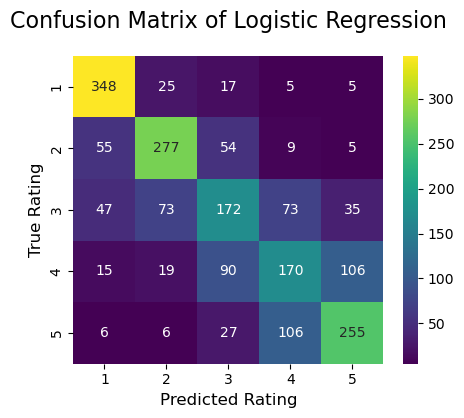

In [56]:

labels = [1,2,3,4,5]

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Rating", fontsize=12)
plt.ylabel("True Rating", fontsize=12)
plt.title("Confusion Matrix of Logistic Regression", fontsize=16, pad=20)
plt.show()

#### Inferences :
####  * 58% of the reviews were correctly classified.
####  * Rating 1, 2 and 5 are best predicted ratings

####   -- Rating 1 : 339/400 is correct (mostly predicted correctly)
####   -- Rating 2 : 263/400
####   -- Rating 5 : 251/400 is correct

####  * Rating 3 and 4 is more misclassified
####  * Most of the misclassifications are 1 rating away. (for example rating 3 is predicted as 2 or 4)

# Fine Tuning 


* Changing the number of maximum features in TF-IDF vectorizer : No change in accuracy
* After updating the parameters ngram_range, min_df and max_df , the accuracy increased by 2% resulting 60.5% accuracy.
* Tried different solvers for the model, but it did not made much difference in the accuracy.
* Adjusting Regularization in the logistic regression model : model Overfitting 

## SVM

In [57]:
from sklearn.svm import LinearSVC  
# model_A = svm
model_A = LinearSVC(random_state=42)
model_A.fit(x_train_vec, y_train)
y_pred_svm = model_A.predict(x_test_vec)

In [58]:
import joblib

joblib.dump(model_A, "Model_A.pkl")
joblib.dump(vectorizer_A, "Vec_A.pkl")

['Vec_A.pkl']

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

print("\nAccuracy of model : ",accuracy_svm)
print("Precision         : ",precision_svm)
print("Recall            : ",recall_svm)
print("F1 Score          : ",f1_svm)
print("\nConfusion Matrix : \n",cm_svm)


Accuracy of model :  0.6275
Precision         :  0.6117347437037477
Recall            :  0.6275
F1 Score          :  0.6167391351196915

Confusion Matrix : 
 [[372  11  10   5   2]
 [ 30 317  36  12   5]
 [ 42  65 160  80  53]
 [ 13  25  84 153 125]
 [  7   9  27 104 253]]


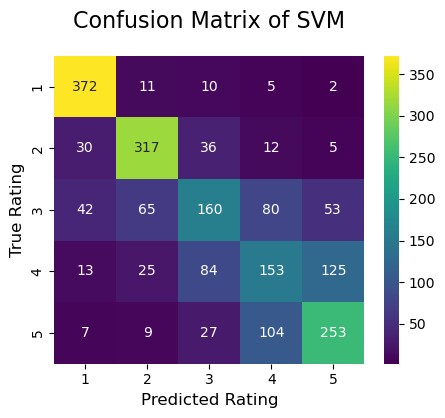

In [60]:
labels = [1,2,3,4,5]

plt.figure(figsize=(5,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='viridis', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Rating", fontsize=12)
plt.ylabel("True Rating", fontsize=12)
plt.title("Confusion Matrix of SVM", fontsize=16, pad=20)
plt.show()

## Multinomial Naive Bayes

In [61]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_vec, y_train)
y_pred_mnb = mnb.predict(x_test_vec)


In [62]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb, average='weighted')
recall_mnb = recall_score(y_test, y_pred_mnb, average='weighted')
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

print("\nAccuracy of model : ",accuracy_mnb)
print("Precision         : ",precision_mnb)
print("Recall            : ",recall_mnb)
print("F1 Score          : ",f1_mnb)
print("\nConfusion Matrix : \n",cm_mnb)


Accuracy of model :  0.596
Precision         :  0.5920619944791307
Recall            :  0.596
F1 Score          :  0.5927789977648829

Confusion Matrix : 
 [[334  31  26   4   5]
 [ 68 242  68  13   9]
 [ 47  56 182  85  30]
 [  9  26  80 182 103]
 [  6   6  24 112 252]]


In [63]:
import numpy as np

results_df = pd.DataFrame({
    "Review": x_test_clean,
    "Actual Rating": y_test,
    "Predicted Rating": y_pred_svm
}).reset_index(drop=True)

sampled_reviews = (
    results_df.groupby("Actual Rating", group_keys=False)
    .apply(lambda x: x.sample(n=5, random_state=42) if len(x) >= 5 else x)
    .reset_index(drop=True)
)

sampled_reviews.index = np.arange(1, len(sampled_reviews) + 1)
sampled_reviews.index.name = "S.No"

sampled_reviews



C:\Users\joelk\AppData\Local\Temp\ipykernel_18944\1355176769.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=5, random_state=42) if len(x) >= 5 else x)


,Review,Actual Rating,Predicted Rating
S.No,,,
1,perhaps weve little spoiled visiting disneywor...,1,1
2,wonder profit come service spent two day two p...,1,1
3,place rip overcrowded reflect walt disney visi...,1,1
4,returned two day visit disneyland paris say di...,1,1
5,texted friend saying weve disneyland 6 hour ha...,1,1
6,visited 2 young child train disneyland nice vi...,2,2
7,went euro disney 1 10 5 10 say rip moment got ...,2,2
8,stayed hong kong one night visit honk kong dis...,2,2
9,last visited disneyland 10 year ago great memo...,2,2
